## **Name: EDA & Train**

**Overview:** Exploratory Data Analysis (EDA) for initial discovery, and to help identify training parameters
                
**Data Scientist:** Aaron Medina

**GitHub:**

**Creation Date:** 10/27/2022

**Instance:** Local

**References:** 

**Script Change Notes:**

x/x/xxxx: Aaron - Note

In [1]:
# Import required packages
import pickle
import warnings
import matplotlib.pyplot as plt

import pyLDAvis
import pyLDAvis.sklearn
from wordcloud import WordCloud
from __future__ import print_function
from sklearn.decomposition import LatentDirichletAllocation

pyLDAvis.enable_notebook()

c:\Anaconda3\lib\site-packages\scipy\special\orthogonal.py:79: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from numpy import (exp, inf, pi, sqrt, floor, sin, cos, around, int,
c:\Anaconda3\lib\site-packages\scipy\special\orthogonal.py:79: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current us

In [2]:
# Initialize parameters
train_corpus_path = 'data/train_corpus.pkl'
tf_vectorizer_model_path = 'models/tf_vectorizer_model.pkl'
tfidf_vectorizer_model_path = 'models/tfidf_vectorizer_model.pkl'
train_dtm_tfidf_path = 'data/train_dtm_tfidf.pkl'
topic_dict_path = 'data/topic_dict.pkl'
lda_model_path = 'models/lda_model.pkl'

num_topics = 3
random_state = 42

In [3]:
# Load data and NLP models
train_corpus = pickle.load(open(train_corpus_path, "rb"))
train_dtm_tfidf = pickle.load(open(train_dtm_tfidf_path, "rb"))
tf_vectorizer_model = pickle.load(open(tf_vectorizer_model_path, "rb"))
tfidf_vectorizer_model = pickle.load(open(tfidf_vectorizer_model_path, "rb"))

c:\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:172: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


### EDA

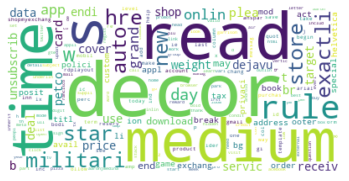

In [4]:
warnings.filterwarnings("ignore", category=DeprecationWarning) 
# Create word cloud to get general idea of highest word frequencies
text = " ".join(train_corpus)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [5]:
warnings.filterwarnings("ignore") 

# Train LDA model
lda_model = LatentDirichletAllocation(n_components = num_topics, random_state = random_state)
lda_model.fit(train_dtm_tfidf)

LatentDirichletAllocation(n_components=3, random_state=42)

In [6]:
# Generate LDA visualization and tuning interaction
pyLDAvis.sklearn.prepare(lda_model, train_dtm_tfidf, tfidf_vectorizer_model)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.098281  0.014497       1        1  55.552696
0      0.030310 -0.063995       2        1  28.585436
1      0.067971  0.049498       3        1  15.861868, topic_info=           Term       Freq      Total Category  logprob  loglift
9594      petco  57.000000  57.000000  Default  30.0000  30.0000
10533      read  39.000000  39.000000  Default  29.0000  29.0000
7944   militari  44.000000  44.000000  Default  28.0000  28.0000
12279      star  42.000000  42.000000  Default  27.0000  27.0000
4446    exactli  10.000000  10.000000  Default  26.0000  26.0000
...         ...        ...        ...      ...      ...      ...
14213    weight   4.474155  13.904098   Topic3  -6.2262   0.7074
156     address   4.010604  15.511353   Topic3  -6.3355   0.4886
2444      click   3.845746  12.261074   Topic3  -6.3775   0.6818
9765      pleas   4.228411  26.667091   Topic3  -6.2827  -0.0004
4967      guest   3.431065   6.395922   Topic3  -6.4916   1.2185

[165 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
9          1  0.321615  aaronjmedina
9          2  0.643229  aaronjmedina
9          3  0.080404  aaronjmedina
156        1  0.451282       address
156        2  0.322345       address
...      ...       ...           ...
14194      2  0.856979        websit
14203      1  0.967255          week
14213      1  0.647291        weight
14213      3  0.287685        weight
14855      1  0.963725          zoom

[187 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

In [9]:
# Declare the assignments of topics based on review, save dictionary for inference mapping
### 3 Topics ###
topic_dict = {0 : "offers / promotions", 
                1 : "social media / subscriptions", 
                2 : "articles / connections"}

In [10]:
# Save topic mappings and model
pickle.dump(topic_dict, open(topic_dict_path, "wb"))
pickle.dump(lda_model, open(lda_model_path, "wb"))